<a href="https://colab.research.google.com/github/seunghee0518/AI_python/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%85%8B_%EC%A0%84%EC%B2%98%EB%A6%AC%EB%B0%8F%EB%B0%B0%EC%97%B4%EC%A0%80%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 셋 전처리 및 시각화

In [5]:
## 구글 드라이브와 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Import libraries

In [3]:
## 파일 전처리 등
import cv2 
import numpy as np 
import pandas as pd
import keras
import math

import matplotlib.pyplot as plt
import os # miscellaneous operating system interfaces
import shutil # high-level file operations
from glob import glob
from tqdm import tqdm
import re
from sklearn.model_selection import train_test_split
import random
import cv2
from PIL import Image
import PIL.ImageOps    
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import gc

## 케라스 패키지 import
#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.layers.core import Layer # !pip install dependencies # 설치 안됨
import keras.backend as K
import tensorflow as tf
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten
from keras.datasets import cifar10 
from keras import backend as K 
from keras.utils import np_utils 
from tensorflow.keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [6]:
#!pip install keras
import sys
print(sys.version)
print(keras.__version__)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
2.8.0


## 이미지셋 분석

In [3]:
import cv2 
import numpy as np 
import pandas as pd
import keras
import math
import matplotlib.pyplot as plt

train_df = pd.read_csv('/content/drive/Othercomputers/내 MacBook Pro/open/train_df.csv')

In [67]:
train_df

,index,file_name,objects_class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good
...,...,...,...,...,...
4272,4272,14272.png,transistor,good,transistor-good
4273,4273,14273.png,transistor,good,transistor-good
4274,4274,14274.png,grid,good,grid-good
4275,4275,14275.png,zipper,good,zipper-good


In [25]:
train_df.rename(columns = {'class' : 'objects_class'}, inplace = True)
state_name1 = ['good', 'the_others']
state_cnt1 = [len(train_df[train_df.state == 'good']), len(train_df[train_df.state != 'good'])]

except_good = train_df[train_df.state != 'good'].state.unique().tolist()
except_good_cnt = [len(train_df[train_df.state == f'{x}']) for x in except_good]

state_name2 = train_df.state.unique().tolist()
state_cnt2 = [len(train_df[train_df.state == f'{x}']) for x in state_name2]

class_name = train_df.objects_class.unique().tolist()
class_cnt = [len(train_df[train_df.objects_class == f'{x}']) for x in class_name]

label_name = train_df.label.unique().tolist()
label_cnt = [len(train_df[train_df.label == f'{x}']) for x in label_name]

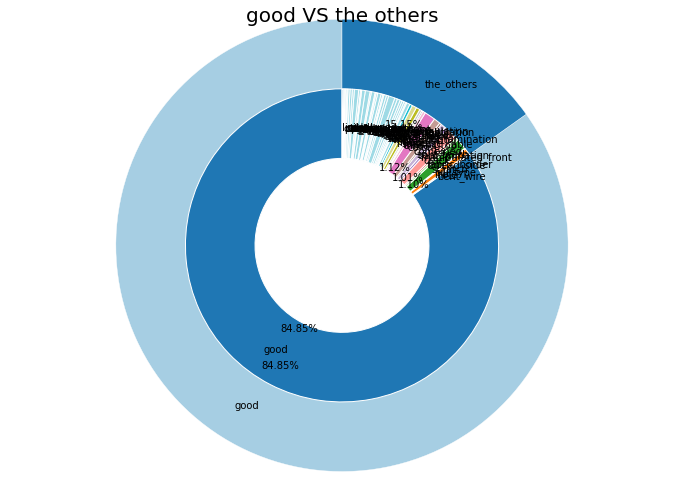

In [61]:
import matplotlib.pyplot as plt
import numpy as np

## state : good vs the others
train_df.rename(columns = {'class' : 'objects_class'}, inplace = True)
state_name1 = ['good', 'the_others']
state_cnt1 = [len(train_df[train_df.state == 'good']), len(train_df[train_df.state != 'good'])]

except_good = train_df[train_df.state != 'good'].state.unique().tolist()
except_good_cnt = [len(train_df[train_df.state == f'{x}']) for x in except_good]


plt.rcParams['figure.figsize'] = [12, 8] # 그래프 크기

## 컬러맵 지정
cmap1 = plt.get_cmap('Paired') # 컬러맵
cmap2 = plt.get_cmap('tab20') # 컬러맵2
outer_colors = cmap1(np.array([x for x in range(len(state_name1))]))
inner_colors = cmap2(np.array([x for x in range(len(except_good))]))

## 원 별 두께
width_num = 0.4

# Outside Ring
fig, ax = plt.subplots()
ax.axis('equal')
pie_outside= ax.pie(state_cnt1, 
                    radius=1.3, 
                    labels=state_name1, 
                    labeldistance=0.8,
                    startangle = 90,
                    autopct=lambda p : '{:.2f}%'.format(p) if p > 1 else "",
                    colors = outer_colors,
                    wedgeprops = {'edgecolor' : 'w', 'linewidth' : 0.4, 'width' : 0.5})

# Inside Ring
pie_inside, plt_labels, junk = ax.pie(state_cnt2, 
                                      radius=(1.3 - width_num), 
                                      labels=state_name2, 
                                      labeldistance=0.75, 
                                      autopct=lambda p : '{:.2f}%'.format(p) if p > 1 else "",
                                      startangle = 90,
                                      colors=inner_colors)
plt.setp(pie_inside, 
         width=width_num, 
         edgecolor='white')
plt.title('good VS the others', fontsize=20)
plt.show()

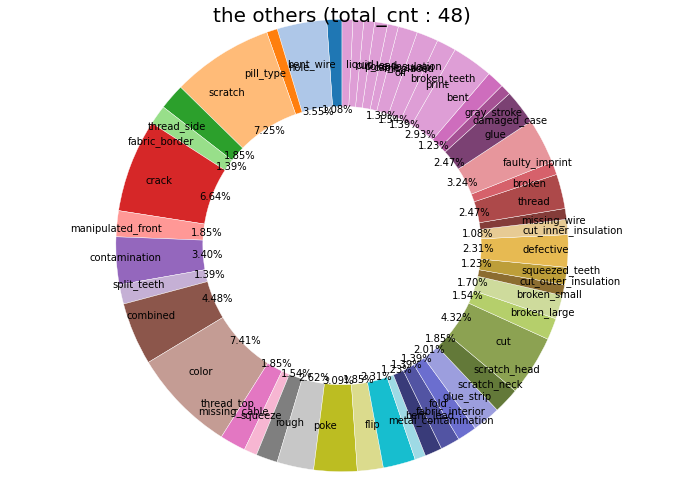

In [71]:
## state : good vs the others
plt.rcParams['figure.figsize'] = [12, 8] # 그래프 크기

except_good = train_df[train_df.state != 'good'].state.unique().tolist()
except_good_cnt = [len(train_df[train_df.state == f'{x}']) for x in except_good]

## 컬러맵 지정
cmap1 = plt.get_cmap('tab20') # 컬러맵
cmap2 = plt.get_cmap('tab20b') # 컬러맵2
outer_colors = np.concatenate([cmap1(np.array([x for x in range(len(except_good[:20]))])), cmap2(np.array([x for x in range(len(except_good[20:]))]))], 0)
#inner_colors = cmap2(np.array([x for x in range(len(except_good))]))

## 원 별 두께
width_num = 0.4

# Outside Ring
fig, ax = plt.subplots()
ax.axis('equal')
pie_outside= ax.pie(except_good_cnt, 
                    radius=1.3, 
                    labels=except_good, 
                    labeldistance=0.8,
                    startangle = 90,
                    autopct=lambda p : '{:.2f}%'.format(p) if p > 1 else "",
                    colors = outer_colors,
                    wedgeprops = {'edgecolor' : 'w', 'linewidth' : 0.4, 'width' : 0.5})

# # Inside Ring
# pie_inside, plt_labels, junk = ax.pie(state_cnt2, 
#                                       radius=(1.3 - width_num), 
#                                       labels=state_name2, 
#                                       labeldistance=0.75, 
#                                       autopct=lambda p : '{:.2f}%'.format(p) if p > 1 else "",
#                                       startangle = 90,
#                                       colors=inner_colors)
plt.setp(pie_inside, 
         width=width_num, 
         edgecolor='white')
plt.title(f'the others (total_cnt : {len(except_good)})', fontsize=20)
plt.show()

In [70]:
len(class_cnt), len(label_cnt)

(15, 88)

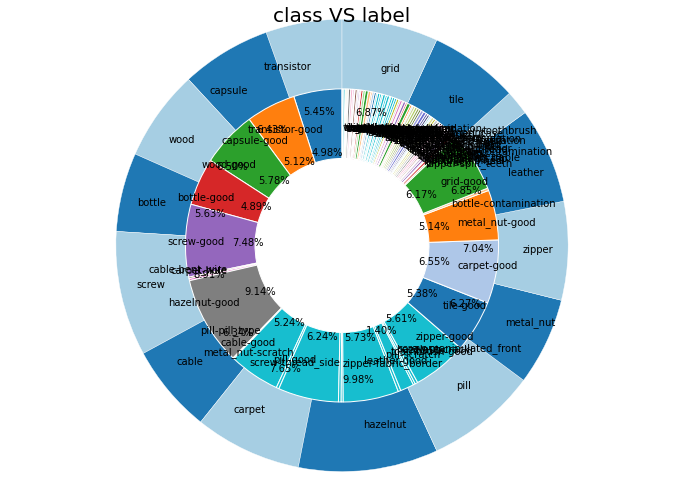

In [74]:
class_name = train_df.objects_class.unique().tolist()
class_cnt = [len(train_df[train_df.objects_class == f'{x}']) for x in class_name]

label_name = train_df.label.unique().tolist()
label_cnt = [len(train_df[train_df.label == f'{x}']) for x in label_name]

## state : class vs label
plt.rcParams['figure.figsize'] = [12, 8] # 그래프 크기

## 컬러맵 지정
cmap1 = plt.get_cmap('Paired') # 컬러맵
cmap2 = plt.get_cmap('tab10') # 컬러맵2
cmap3 = plt.get_cmap('tab20') # 컬러맵2
cmap4 = plt.get_cmap('tab20b') # 컬러맵2
cmap5 = plt.get_cmap('tab20c') # 컬러맵2
outer_colors = cmap1(np.array([x for x in range(len(state_name1))]))
inner_colors = np.concatenate([cmap2(np.array([x for x in range(len(except_good[:20]))])),
                               cmap3(np.array([x for x in range(len(except_good[20:40]))])),
                               cmap4(np.array([x for x in range(len(except_good[40:60]))])),
                               cmap5(np.array([x for x in range(len(except_good[60:]))]))], 0)

## 원 별 두께
width_num = 0.4

# Outside Ring
fig, ax = plt.subplots()
ax.axis('equal')
pie_outside= ax.pie(class_cnt, 
                    radius=1.3, 
                    labels=class_name, 
                    labeldistance=0.8,
                    startangle = 90,
                    autopct=lambda p : '{:.2f}%'.format(p) if p > 1 else "",
                    colors = outer_colors,
                    wedgeprops = {'edgecolor' : 'w', 'linewidth' : 0.4, 'width' : 0.5})

# Inside Ring
pie_inside, plt_labels, junk = ax.pie(label_cnt, 
                                      radius=(1.3 - width_num), 
                                      labels=label_name, 
                                      labeldistance=0.75, 
                                      autopct=lambda p : '{:.2f}%'.format(p) if p > 1 else "",
                                      startangle = 90,
                                      colors=inner_colors)
plt.setp(pie_inside, 
         width=width_num, 
         edgecolor='white')
plt.title('class VS label', fontsize=20)
plt.show()

## 이미지셋준비
* 기본 이미지와 증량된 이미지로 구성된 넘파이배열 데이터셋을 생성함(증량된 이미지는 별도로 저장하지 않음)
* 이미지 증량 방법
0. 기본이미지
> 단순 반전 및 회전
  1. 좌우반전     
  2. 상하반전
  3. 90도 회전
  4. 180도 회전
  5. 270도 회전

 > 이상치 데이터
  6. 찌그러짐  : shear_range = 0.5
  7. 줌인아웃 : zoom_range = [0.5, 2]
  8. 노이즈(가우스노이즈) 901000대 



In [5]:
#/content/drive/Othercomputers/내 MacBook Pro/open/
base_dir = '/content/drive/Othercomputers/내 MacBook Pro/open'
train_dir = '/content/drive/Othercomputers/내 MacBook Pro/open/train'
test_dir = '/content/drive/Othercomputers/내 MacBook Pro/open/open/test'

train_df = pd.read_csv('/content/drive/Othercomputers/내 MacBook Pro/open/train_df.csv')
test_df = pd.read_csv('/content/drive/Othercomputers/내 MacBook Pro/open/test_df.csv')

In [6]:
## 주어진 train_df에 각 레이블마다 원핫인코딩값을 생성할 인덱스 부여
final_train88_df = train_df.copy()
label_lst = final_train88_df.label.unique().tolist()
label_lst.sort()
one_hot_label = pd.DataFrame(label_lst, columns = {'label'})
one_hot_label['one_hot_label'] = one_hot_label.index.tolist()
one_hot_label

final_train88_df = pd.merge(final_train88_df, one_hot_label, how = 'left', on = 'label')
final_train88_df

,index,file_name,class,state,label,one_hot_label
0,0,10000.png,transistor,good,transistor-good,72
1,1,10001.png,capsule,good,capsule-good,15
2,2,10002.png,transistor,good,transistor-good,72
3,3,10003.png,wood,good,wood-good,76
4,4,10004.png,bottle,good,bottle-good,3
...,...,...,...,...,...,...
4272,4272,14272.png,transistor,good,transistor-good,72
4273,4273,14273.png,transistor,good,transistor-good,72
4274,4274,14274.png,grid,good,grid-good,28
4275,4275,14275.png,zipper,good,zipper-good,84


In [ ]:
## 레이블별 학습 데이터양 조정을 위해 레이블별로 넘파이 배열 생성
# base_dir : /content/drive/MyDrive/DACON_이상치 탐지 알고리즘 경진대회/open

## 기본 설정값
imageset_save_dir = '/content/drive/MyDrive/DACON_이상치 탐지 알고리즘 경진대회/open/imageset' # 저장 경로
# 넘파일 배열을 생성할 레이블의 one_hot_label값 [0 ~ 87] / df > one_hot_label 참조
num_total_label = 88 # 레이블 총 개수
one_hot_label = [x for x in range(88)]

# 넘파일 배열을 생성할 이미지의 타입(기본, 좌우반전 , 찌그러짐 등등) [0 ~ 8]
img_type_lst = [8] # 6,7,8 제외

img_rows = 512
img_cols = 512

## 이미지 배열 파일 생성
for label_idx in tqdm(one_hot_label) : 
  file_name_list = final_train88_df[final_train88_df.one_hot_label == label_idx].file_name.tolist() # 해당 레이블에 해당하는 이미지파일명 리스트

  # img_label : Y 배열에 들어갈 원-핫 인코딩된 정답값
  img_label = [0 for i in range(num_total_label)]
  img_label[label_idx] = 1

  ## 이미지 imread 및 이미지 증가
  for img_type in img_type_lst: # 이미지 증가
    try:
      del X, Y
      gc.collect()
    except: pass

    X = [] # 입력 데이터
    Y = [] # 정답값

    if (img_type == 0) : # 이미지 조정 없이 바로 넘파이 배열로 전환
      for img_name in tqdm(file_name_list):
        img = cv2.imread(f'{train_dir}/{img_name}') # train_dir = '/content/drive/Othercomputers/내 MacBook Pro/open/train'
        img = cv2.resize(img, (img_rows,img_cols)) # 사이즈 변경
        X.append(img/256) # 0~1 사이값으로 정규화
        Y.append(img_label)

    elif (img_type == 1) : # 좌우반전
      for img_name in tqdm(file_name_list):
        img = Image.open(f'{train_dir}/{img_name}')
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
        img = np.array(img)
        img = cv2.resize(img, (img_rows,img_cols))
        X.append(img/256) # 0~1 사이값으로 정규화
        Y.append(img_label)

    elif (img_type == 2) : # 상하반전
      for img_name in tqdm(file_name_list):
        img = Image.open(f'{train_dir}/{img_name}')
        img = img.transpose(Image.FLIP_TOP_BOTTOM)
        img = np.array(img)
        img = cv2.resize(img, (img_rows,img_cols))
        X.append(img/256) # 0~1 사이값으로 정규화
        Y.append(img_label)

    elif (img_type == 3) : # 90도 회전
      for img_name in tqdm(file_name_list):
        img = Image.open(f'{train_dir}/{img_name}')
        img = img.transpose(Image.ROTATE_90)
        img = np.array(img)
        img = cv2.resize(img, (img_rows,img_cols))
        X.append(img/256) # 0~1 사이값으로 정규화
        Y.append(img_label)

    elif (img_type == 4) : # 180도 회전
      for img_name in tqdm(file_name_list):
        img = Image.open(f'{train_dir}/{img_name}')
        img = img.transpose(Image.ROTATE_180)
        img = np.array(img)
        img = cv2.resize(img, (img_rows,img_cols))
        X.append(img/256) # 0~1 사이값으로 정규화
        Y.append(img_label)

    elif (img_type == 5) : # 270도 회전
      for img_name in tqdm(file_name_list):
        img = Image.open(f'{train_dir}/{img_name}')
        img = img.transpose(Image.ROTATE_270)
        img = np.array(img)
        img = cv2.resize(img, (img_rows,img_cols))
        X.append(img/256) # 0~1 사이값으로 정규화
        Y.append(img_label)

    elif (img_type == 6):
      for img_name in tqdm(file_name_list):
        #이미지 찌그러짐 shear_range = 0.5
        #print("shear")
        img = load_img(f'{train_dir}/{img_name}')
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        img = img_shear.fit(x).flow(x, batch_size=1)
        datagen.fit(x)  
        datagen.flow(x_train, y_train, batch_size=32, subset='training')
        img = cv2.resize(img, (img_rows,img_cols))
        X.append(img) 
        Y.append(img_label)

    elif (img_type == 7) : 
      for img_name in tqdm(file_name_list):
        #이미지 줌인아웃 zoom_range = [0.5, 2]
        #print("zoom_in_out")
        img = load_img(f'{train_dir}/{img_name}')
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        img = img_zoom.flow(x, batch_size=1)[0][0]
        img = cv2.resize(img, (img_rows,img_cols))
        X.append(img) 
        Y.append(img_label)
        
    elif (img_type == 8):
      for img_name in tqdm(file_name_list):
        #print("noise")
        img = cv2.imread(f'{train_dir}/{img_name}')
        row,col,ch= img.shape
        mean = 0
        var = 0.1
        sigma = var ** 0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy_array = img + gauss # 기존 이미지 배열 + 노이즈 추가
        noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
        img = cv2.resize(np.asarray(noisy_image), (img_rows,img_cols))
        X.append(img) 
        Y.append(img_label)

    # 배열 -> 넘파이 배열로 변환
    X = np.array(X)
    Y = np.array(Y)

    # numpy 배열 저장 # 압축 저장 함수 savez_compressed / 압축없이 저장 savez : 차이 (많은 공간이 절약되지만 로드 시간이 약간 소요됨)
    np.savez_compressed(f"{imageset_save_dir}/imageset_label{label_idx}_type{img_type}_{img_rows}*{img_cols}.npz", x=X, y=Y)

## 이미지셋 통합 후 학습 데이터 생성

In [8]:
imageset_save_dir = '/content/drive/MyDrive/DACON_이상치 탐지 알고리즘 경진대회/open/imageset'
imagset512 = glob(f'{imageset_save_dir}/*_512*')
imagset512.sort()

In [10]:
## 저장된 이미지 불러오기
for i in tqdm(range(len(imagset512))):
  path = imagset512[i]
  if i == 0:
    xy_savez_load = np.load(path)
    X = xy_savez_load['x']
    Y = xy_savez_load['y']
    xy_savez_load.close()
  else:
    xy_savez_load = np.load(path)
    each_X = xy_savez_load['x']
    each_Y = xy_savez_load['y']
    xy_savez_load.close()

    X = np.concatenate([X, each_X], 0)
    Y = np.concatenate([Y, each_Y], 0)
    try:
      del each_X, each_Y
      gc.collect()
    except: pass

print('X 차원 : ', np.shape(X))
print('Y 차원 : ', np.shape(Y))

 11%|█         | 66/612 [04:47<39:36,  4.35s/it]  


KeyboardInterrupt: ignored

In [40]:
X = np.array
type(X)

builtin_function_or_method

In [37]:
c = np.concatenate([X1, X2], 0)
np.shape(c)

(16, 512, 512, 3)

In [20]:
img = Image.open(f'{train_dir}/{img_name}')
#img = img.transpose(Image.FLIP_LEFT_RIGHT)
a = cv2.resize(np.array(img), (img_rows,img_cols))
np.shape(a)

(512, 512, 3)

In [22]:
np.shape(X)

(10, 512, 512, 3)

In [145]:
Image.fromarray(np.shape(X[0]), 'RGB')

AttributeError: ignored

## 이미지증량 코드 초안

In [132]:
np.shape(img[0])

(900, 900, 3)

In [43]:
  ## 찌그러짐 & 줌 인아웃
  img_shear = ImageDataGenerator(shear_range = 0.5)
  img_zoom  = ImageDataGenerator(zoom_range = [0.5, 2])

  for i in tqdm(range(len(file_names))): 
      #change_picture_index = random.randrange(1, total_origin_image_num-1)
      #print(change_picture_index)
      #print(file_names[change_picture_index])
      file_name = file_names[i] # 랜덤 인덱스 사용안함
      
      origin_image_path = f'{file_path}/{file_name}'
      #print(origin_image_path)
      image = Image.open(origin_image_path)
      
      ## 증가 종류
      for image_augment in image_augment_lst: # 2 ~ 9    
        if (image_augment == 2):
          #이미지 좌우 반전
          #print("FLIP_LEFT_RIGHT")
          image = Image.open(origin_image_path)
          new_image = image.transpose(Image.FLIP_LEFT_RIGHT)
          new_image.save(f'{file_path}/{image_augment}0{file_name}')

        elif (image_augment == 3):
          #이미지 상하반전
          #print("FLIP_TOP_BOTTOM")
          new_image = image.transpose(Image.FLIP_TOP_BOTTOM)
          new_image.save(f'{file_path}/{image_augment}0{file_name}')

        elif (image_augment == 4):
          #이미지 90도 회전
          #print("ROTATE_90")
          new_image = image.transpose(Image.ROTATE_90)
          new_image.save(f'{file_path}/{image_augment}0{file_name}')  

        elif (image_augment == 5):
          #이미지 180도 회전
          #print("ROTATE_180")
          new_image = image.transpose(Image.ROTATE_180)
          new_image.save(f'{file_path}/{image_augment}0{file_name}')    

        elif (image_augment == 6):
          #이미지 270도 회전
          #print("ROTATE_270")
          new_image = image.transpose(Image.ROTATE_270)
          new_image.save(f'{file_path}/{image_augment}0{file_name}')  

        elif (image_augment == 7):
          #이미지 찌그러짐 shear_range = 0.5
          #print("shear")
          img = load_img(origin_image_path)
          x = img_to_array(img)        #(3, 150, 150) 크기의 NumPy 배열
          x = x.reshape((1,) + x.shape)#(1, 3, 150, 150) 크기의 NumPy 배열

          img_shear.flow(x, batch_size=1,
                        save_to_dir=f'{file_path}/',
                        save_prefix=f'{image_augment}0{file_name[:-4]}',
                        save_format='png') 
        elif (image_augment == 8):
          #이미지 줌인아웃 zoom_range = [0.5, 2]
          #print("zoom_in_out")
          img = load_img(origin_image_path)
          x = img_to_array(img)        #(3, 150, 150) 크기의 NumPy 배열
          x = x.reshape((1,) + x.shape)#(1, 3, 150, 150) 크기의 NumPy 배열

          img_zoom.flow(x, batch_size=1,
                        save_to_dir=f'{file_path}/',
                        save_prefix=f'{image_augment}0{file_name[:-4]}',
                        save_format='png') 

    #     elif(random_augment == 2):
    #         #이미지 범위내 기울이기
    #         print("rotate")
    #         rotated_image = image.rotate(random.randrange(-20, 20))
    #         rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.png')
            
        elif(image_augment == 9):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            #print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            new_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            new_image.save(f'{file_path}/{image_augment}0{file_name}') 
        print(f'{train_label[folder_idx]} : {i+1}')
        ## 변수 지우기

In [ ]:
img_rows = 32
img_cols = 32
img_name = '10000.png'
img = cv2.imread(f'{train_dir}/{img_name}') # image_dir = '/content/drive/Othercomputers/내 MacBook Pro/open/train'
img = cv2.resize(img, (img_rows,img_cols)) # 사이즈 변경

In [54]:
## 저장된 이미지 불러오기
xy_savez_load = np.load(f"/content/drive/MyDrive/DACON_이상치 탐지 알고리즘 경진대회/open/imageset_224*224.npz")
type(xy_savez_load)
X = xy_savez_load['x']
Y = xy_savez_load['y']
xy_savez_load.close()

In [68]:
np.shape(X), np.shape(Y)

((4277, 224, 224, 3), (4277, 88))

In [69]:
## 넘파이 배열 합치기
np.shape(np.concatenate([Y, Y], 0))

(8554, 88)

## 이미지 증가

In [ ]:
## train 데이터 개수 및 레이블 개수
train_label = train_df.label.tolist()
train_label_unique = list(set(train_label))
print(len(train_label), len(train_label_unique))
train_label_unique.sort()

4277 88


In [ ]:
train_label_unique.sort()

In [ ]:
folder_idx = 0
file_path = f'{base_dir}/train_label_88/{train_label[folder_idx]}'
file_names = os.listdir(file_path)
len(file_names)

213

In [ ]:
base_dir

'/content/drive/Othercomputers/내 MacBook Pro/open'

In [ ]:
## 이미지 증량
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from tqdm import tqdm
import gc

# base_dir = '/content/drive/Othercomputers/내 MacBook Pro/open'

## 이미지 증가
for folder_idx in tqdm(range(len(train_label_unique))):
  file_path = f'{base_dir}/train_label_88/{train_label[folder_idx]}' # 한개 폴더 씩 가져옴
  file_names = os.listdir(file_path)
  total_origin_image_num = len(file_names)
  print(total_origin_image_num)

  ## 이미지 증가 종류
  image_augment_lst = [x for x in range(2, 10)] 
  '''
  2 : 좌우반전,
  3 : 상하반전,
  4 : 90도회전,
  5 : 180도 회전
  6 : 270도 회전
  7 : 찌그러짐
  8 : 줌인아웃
  9 : 가우스노이즈
  '''
  ## 찌그러짐 & 줌 인아웃
  img_shear = ImageDataGenerator(shear_range = 0.5)
  img_zoom  = ImageDataGenerator(zoom_range = [0.5, 2])

  for i in tqdm(range(len(file_names))): 
      #change_picture_index = random.randrange(1, total_origin_image_num-1)
      #print(change_picture_index)
      #print(file_names[change_picture_index])
      file_name = file_names[i] # 랜덤 인덱스 사용안함
      
      origin_image_path = f'{file_path}/{file_name}'
      #print(origin_image_path)
      image = Image.open(origin_image_path)
      
      ## 증가 종류
      for image_augment in image_augment_lst: # 2 ~ 9    
        if (image_augment == 2):
          #이미지 좌우 반전
          #print("FLIP_LEFT_RIGHT")
          new_image = image.transpose(Image.FLIP_LEFT_RIGHT)
          new_image.save(f'{file_path}/{image_augment}0{file_name}')

        elif (image_augment == 3):
          #이미지 상하반전
          #print("FLIP_TOP_BOTTOM")
          new_image = image.transpose(Image.FLIP_TOP_BOTTOM)
          new_image.save(f'{file_path}/{image_augment}0{file_name}')

        elif (image_augment == 4):
          #이미지 90도 회전
          #print("ROTATE_90")
          new_image = image.transpose(Image.ROTATE_90)
          new_image.save(f'{file_path}/{image_augment}0{file_name}')  

        elif (image_augment == 5):
          #이미지 180도 회전
          #print("ROTATE_180")
          new_image = image.transpose(Image.ROTATE_180)
          new_image.save(f'{file_path}/{image_augment}0{file_name}')    

        elif (image_augment == 6):
          #이미지 270도 회전
          #print("ROTATE_270")
          new_image = image.transpose(Image.ROTATE_270)
          new_image.save(f'{file_path}/{image_augment}0{file_name}')  

        elif (image_augment == 7):
          #이미지 찌그러짐 shear_range = 0.5
          #print("shear")
          img = load_img(origin_image_path)
          x = img_to_array(img)        #(3, 150, 150) 크기의 NumPy 배열
          x = x.reshape((1,) + x.shape)#(1, 3, 150, 150) 크기의 NumPy 배열

          img_shear.flow(x, batch_size=1,
                        save_to_dir=f'{file_path}/',
                        save_prefix=f'{image_augment}0{file_name[:-4]}',
                        save_format='png') 
        elif (image_augment == 8):
          #이미지 줌인아웃 zoom_range = [0.5, 2]
          #print("zoom_in_out")
          img = load_img(origin_image_path)
          x = img_to_array(img)        #(3, 150, 150) 크기의 NumPy 배열
          x = x.reshape((1,) + x.shape)#(1, 3, 150, 150) 크기의 NumPy 배열

          img_zoom.flow(x, batch_size=1,
                        save_to_dir=f'{file_path}/',
                        save_prefix=f'{image_augment}0{file_name[:-4]}',
                        save_format='png') 

    #     elif(random_augment == 2):
    #         #이미지 범위내 기울이기
    #         print("rotate")
    #         rotated_image = image.rotate(random.randrange(-20, 20))
    #         rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.png')
            
        elif(image_augment == 9):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            #print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            new_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            new_image.save(f'{file_path}/{image_augment}0{file_name}') 
        print(f'{train_label[folder_idx]} : {i+1}')
        ## 변수 지우기
        # del image, new_image
        # gc.collect()
    ###########
    #     elif(random_augment == 2):
    #         #이미지 범위내 기울이기
    #         print("rotate")
    #         rotated_image = image.rotate(random.randrange(-20, 20))
    #         rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.png')
            

capsule-good : 6218
capsule-good : 6218
capsule-good : 6218
capsule-good : 6218


  1%|          | 1/88 [9:32:14<829:44:37, 34334.22s/it]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/PIL/ImageFile.py", line 496, in _save
    fh = fp.fileno()
AttributeError: '_idat' object has no attribute 'fileno'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-cc3aadb87261>", line 122, in <module>
    new_image.save(f'{file_path}/{image_augment}0{file_name}')
  File "/usr/local/lib/python3.7/dist-packages/PIL/Image.py", line 2134, in save
    save_handler(self, fp, filename)
  File "/usr/local/lib/python3.7/dist-packages/PIL/PngImagePlugin.py", line 1291, in _save
    ImageFile._save(im, _idat(fp, chunk), [("zip", (0, 0) + im.size, 0, rawmode)])
  File "/usr/local/lib/python3.7/dist-packages/PIL/ImageFile.py", line 510, in _save
    l, s, d = e.encode(bufsize)
Ke

TypeError: ignored

In [ ]:
file_name

'10049.png'

In [ ]:
'11111.png'[:-4]

'11111'

In [ ]:
# ## 88개 레이블 폴더 생성
# os.mkdir(base_dir+f'train_label_88')
# for dir in train_label_unique:
#   os.mkdir(base_dir+f'train_label_88/{dir}')

In [ ]:
# import shutil
# from tqdm import tqdm

# for i in tqdm(range(len(train_df))):
#   file_name = train_df.loc[i, 'file_name']
#   label     = train_df.loc[i, 'label']

#   source = train_dir + f'/{file_name}'
#   destination = base_dir + f'train_label_88/{label}/{file_name}'
#   shutil.copyfile(source, destination) # 이동이 아닌 카피로 실행함
#   # shutil.move(file_source, file_destination) # 이동하는 코드

100%|██████████| 4277/4277 [23:58<00:00,  2.97it/s]


In [ ]:
# 분리된 이미지 파일 전체 개수 확인
all_folder = glob(base_dir + '/train_label_88/*')
all_img_cnt = 0
all_img_path = []
for folder in tqdm(all_folder, total = len(all_folder)):
  img_list = glob(folder + '/*')
  all_img_path += img_list
  img_cnt = len(img_list)
  all_img_cnt += img_cnt

100%|██████████| 88/88 [00:00<00:00, 908.36it/s]


In [ ]:
# print('분리된 이미지 파일 총 개수 : ', all_img_cnt)

분리된 이미지 파일 총 개수 :  4277


## 이미지 파일 로딩 + float array 변환 + 전처리

In [ ]:
# from keras.preprocessing import image

# def preprocess_img(img_path, target_size):
#   img = image.load_img(img_path, target_size = (target_size, target_size))
#   img_tensor = image.img_to_array(img)
#   img_tensor = np.expand_dims(img_tensor, axis = 0) # 차원 추가
#   img_tensor /= 255. # [0, 1] 범위로 표준화
#   return img_tensor

In [ ]:
error_file_name = train_df[train_df.state != 'good'].file_name.tolist()

,index,file_name,class,state,label
8,8,10008.png,cable,bent_wire,cable-bent_wire
10,10,10010.png,carpet,hole,carpet-hole
13,13,10013.png,pill,pill_type,pill-pill_type
16,16,10016.png,metal_nut,scratch,metal_nut-scratch
19,19,10019.png,screw,thread_side,screw-thread_side
...,...,...,...,...,...
4245,4245,14245.png,leather,cut,leather-cut
4248,4248,14248.png,transistor,bent_lead,transistor-bent_lead
4251,4251,14251.png,cable,combined,cable-combined
4252,4252,14252.png,pill,color,pill-color


In [ ]:
base_dir = ''
error_file_name = train_df[train_df.state != 'good'].file_name.tolist()
all_img_path = [f"{base_dir}/{x}" for x in error_file_name]

In [ ]:
## 이미지 시각화(랜덤 30개만)
import random
n_pic = 30 # 시각화할 이미지 수
n_col = 5 # 가로 개수
n_row = 6 # 세로 개수

target_size = 100
margin = 3

total = np.zeros((n_row * target_size + (n_row - 1) * margin, n_col * target_size + (n_col - 1) * margin, 3))

img_seq = 0

# 전체 중 랜덤 샘플 추출함
sampleList = random.sample(all_img_path, n_pic)

for i in range(n_row):
  for j in range(n_col):
    img_path = sampleList[img_seq]
    img_tensor = preprocess_img(img_path, target_size)

    h_start = i * target_size + i * margin
    h_end   = h_start + target_size
    v_start = j * target_size + j * margin
    v_end   = v_start + target_size

    total[h_start:h_end, v_start:v_end] = img_tensor[0]
    img_seq += 1

plt.figure(figsize = (200, 200))
plt.imshow(total)
plt.show()

## 이미지 파일 -> 학습 데이터로 변경

In [ ]:
base_dir + '/train_label_88/'

'/content/drive/MyDrive/DACON_이상치 탐지 알고리즘 경진대회/open/train_label_88/'

In [ ]:
# 학습 파일 기본 경로 지정 및 분류할 클래스 
import re
import cv2
from sklearn.model_selection import train_test_split

# base_dir : /content/drive/MyDrive/DACON_이상치 탐지 알고리즘 경진대회/open
train_base_dir = base_dir + '/train_label_88/'

categories = train_label_unique
categories.sort() # 알파벳 순으로 정렬
num_classes = len(categories)

In [ ]:
import gc
del X, Y
gc.collect()

454

In [ ]:
# 학습 파일 기본 경로 지정 및 분류할 클래스 
import re
import cv2
from sklearn.model_selection import train_test_split

# base_dir : /content/drive/MyDrive/DACON_이상치 탐지 알고리즘 경진대회/open
train_base_dir = base_dir + '/train_label_88/'

categories = train_label_unique
categories.sort() # 알파벳 순으로 정렬
num_classes = len(categories)

# 이미지 사이즈 변경 : 
img_rows = 1024
img_cols = 1024

X = [] # 입력 데이터
Y = [] # 정답값

for idx, categorie in enumerate(tqdm(categories[22:33])):
  ## label -> 원-핫 인코딩
  label = [0 for i in range(num_classes)]
  label[idx] = 1

  # 이미지 파일 경로
  image_dir = train_base_dir + categorie + '/'

  # 레이블 폴더 별로 이미지 파일 추출
  for top, dir, f in os.walk(image_dir):
    for filename in f:
      img = cv2.imread(image_dir + filename)
      img = cv2.resize(img, (img_rows,img_cols))#, fx=img_w/img.shape[1], fy=img_h/img.shape[0])
      X.append(img/256)
      Y.append(label)

# 배열 -> 넘파이 배열로 변환
X = np.array(X)
Y = np.array(Y)

# numpy 배열 save
np.savez(f"{train_base_dir}/imageset_1024*1024_3.npz", x=X, y=Y)

# # 학습 / 검증 데이터로 분리
# X_train, X_test, y_train, y_test = train_test_split(X, Y) # test_size=0.25(default)

# X_train = X_train.astype('float32')
# y_train = y_train.astype('float32')

# # numpy 배열 저장하기
# xy = (X_train, X_test, y_train, y_test)
# np.save(f"{train_base_dir}img_data.npy", xy)

100%|██████████| 11/11 [00:41<00:00,  3.76s/it]


In [ ]:
np.savez(f"{train_base_dir}/imageset_512*512_2.npz", x=X, y=Y)

In [ ]:
## 저장한 x,y. 배열 가져오기
# 배열로 불러오기
train_base_dir = base_dir + '/train_label_88/'
xy_savez_load = np.load(f"{train_base_dir}/imageset_224*224.npz")
type(xy_savez_load)
X = xy_savez_load['x']
Y = xy_savez_load['y']

In [ ]:
# 저장한 배열로 학습 / 검증 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y) # test_size=0.25(default), shuffle : 셔플여부설정 (default = True)

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

2. Prepare the dataset

In [ ]:
# # load_cifar10_data 전처리 코드
# num_classes = 10 # 분류할 레이블 수

# def load_cifar10_data(img_rows, img_cols):

#     # Load cifar10 training and validation sets
#     (X_train, Y_train), (X_valid, Y_valid) = #cifar10.load_data()

#     ## 데이터셋이 넘 커서 램 감당 안됨
#     X_train = X_train[:100]
#     Y_train = Y_train[:100]

#     X_valid = X_valid[:10]
#     Y_valid = Y_valid[:10]
    
#     # Resize training images
#     X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
#     X_valid = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_valid[:,:,:,:]])

#     # Transform targets to keras compatible format [np_utils.to_categorical ->  Converts a class vector (integers) to binary class matrix] 
#     Y_train = np_utils.to_categorical(Y_train, num_classes)
#     Y_valid = np_utils.to_categorical(Y_valid, num_classes)
    
#     X_train = X_train.astype('float32')
#     X_valid = X_valid.astype('float32')

#     # preprocess data
#     X_train = X_train / 255.0
#     X_valid = X_valid / 255.0

#     return X_train, Y_train, X_valid, Y_valid
# X_train, y_train, X_test, y_test = load_cifar10_data(224, 224) # 이미지 사이즈를 줄임

3. Create the inception module

In [ ]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    ## concatenate  : 선택한 축 방향으로 배열 연결하는 함수[3차원 일 경우 0 : 높이, 1 : 행, 2 : 열, 3 : ?]
    return output

4. Create the GoogLeNet architecture

In [ ]:
# ## 책 코드 카피 + 88레이블로 분류 위해 코드 조정
# from keras.layers.normalization.batch_normalization import BatchNormalization
# kernel_init = keras.initializers.glorot_uniform()
# bias_init = keras.initializers.Constant(value=0.2)

# input_layer = Input(shape=(224, 224, 3)) # (가로, 세로, 채널(컬러 = 3))

# ### A부분 ### 
# x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
# x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
# x = BatchNormalization()(x) # 책내용 코드 추가

# ## 합성곱층 -> 1,1풀링 : 차원축소 +  3,3 풀링
# x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
# x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
# x = BatchNormalization()(x) # 책내용 코드 추가
# x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

# ### B 부분 - 인셉션 모듈 2 + 최대풀링 + 인셉션5 + 최대풀링 + 인셉션2 + 평균 풀링
# x = inception_module(x,
#                      filters_1x1=64,
#                      filters_3x3_reduce=96,
#                      filters_3x3=128,
#                      filters_5x5_reduce=16,
#                      filters_5x5=32,
#                      filters_pool_proj=32,
#                      name='inception_3a')

# x = inception_module(x,
#                      filters_1x1=128,
#                      filters_3x3_reduce=128,
#                      filters_3x3=192,
#                      filters_5x5_reduce=32,
#                      filters_5x5=96,
#                      filters_pool_proj=64,
#                      name='inception_3b')

# x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

# x = inception_module(x,
#                      filters_1x1=192,
#                      filters_3x3_reduce=96,
#                      filters_3x3=208,
#                      filters_5x5_reduce=16,
#                      filters_5x5=48,
#                      filters_pool_proj=64,
#                      name='inception_4a')

# # 중간 분류기 제외
# # classifier_1 = AveragePooling2D((5, 5), strides=3)(x)
# # classifier_1 = Conv2D(128, (1, 1), padding='same', activation='relu')(classifier_1)
# # classifier_1 = Flatten()(classifier_1)
# # classifier_1 = Dense(1024, activation='relu')(classifier_1)
# # classifier_1 = Dropout(0.7)(classifier_1)
# # classifier_1 = Dense(88, activation='softmax', name='auxilliary_output_1')(classifier_1) # 10

# x = inception_module(x,
#                      filters_1x1=160,
#                      filters_3x3_reduce=112,
#                      filters_3x3=224,
#                      filters_5x5_reduce=24,
#                      filters_5x5=64,
#                      filters_pool_proj=64,
#                      name='inception_4b')

# x = inception_module(x,
#                      filters_1x1=128,
#                      filters_3x3_reduce=128,
#                      filters_3x3=256,
#                      filters_5x5_reduce=24,
#                      filters_5x5=64,
#                      filters_pool_proj=64,
#                      name='inception_4c')

# x = inception_module(x,
#                      filters_1x1=112,
#                      filters_3x3_reduce=144,
#                      filters_3x3=288,
#                      filters_5x5_reduce=32,
#                      filters_5x5=64,
#                      filters_pool_proj=64,
#                      name='inception_4d')
# # 중간 분류기 제외
# # classifier_2 = AveragePooling2D((5, 5), strides=3)(x)
# # classifier_2 = Conv2D(128, (1, 1), padding='same', activation='relu')(classifier_2)
# # classifier_2 = Flatten()(classifier_2)
# # classifier_2 = Dense(1024, activation='relu')(classifier_2)
# # classifier_2 = Dropout(0.7)(classifier_2)
# # classifier_2 = Dense(88, activation='softmax', name='auxilliary_output_2')(classifier_2) # 10

# x = inception_module(x,
#                      filters_1x1=256,
#                      filters_3x3_reduce=160,
#                      filters_3x3=320,
#                      filters_5x5_reduce=32,
#                      filters_5x5=128,
#                      filters_pool_proj=128,
#                      name='inception_4e')

# x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

# x = inception_module(x,
#                      filters_1x1=256,
#                      filters_3x3_reduce=160,
#                      filters_3x3=320,
#                      filters_5x5_reduce=32,
#                      filters_5x5=128,
#                      filters_pool_proj=128,
#                      name='inception_5a')

# x = inception_module(x,
#                      filters_1x1=384,
#                      filters_3x3_reduce=192,
#                      filters_3x3=384,
#                      filters_5x5_reduce=48,
#                      filters_5x5=128,
#                      filters_pool_proj=128,
#                      name='inception_5b')
# ## C 부분 : 분류기 구현
# x = AveragePooling2D(pool_size=(7,7), strides=1, padding='valid',name='avg_pool_5_3x3/1')(x)
# x = Conv2D(128, (1, 1), padding='same' activation='relu', name='conv_3_3x3/1')(x)
# x = Flatten()
# x = Dense(1024, activation='relu', name='linear')(x)
# x = Dropout(0.4)(x) # 40% 드롭아웃
# x = Dense(88, activation='softmax', name='output')(x)

# ## 모델 생성
# # GoogleNet model without the classfiers 1 and 2 
# model = Model(input_layer, [x], name='googlenet')
# ## 모델 요약
# model.summary()

In [ ]:
# ## 책 코드 카피
# from keras.layers.normalization.batch_normalization import BatchNormalization
# kernel_init = keras.initializers.glorot_uniform()
# bias_init = keras.initializers.Constant(value=0.2)

# input_layer = Input(shape=(224, 224, 3)) # (가로, 세로, 채널(컬러 = 3))

# ### A부분 ### 
# x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
# x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
# x = BatchNormalization()(x) # 책내용 코드 추가

# ## 합성곱층 -> 1,1풀링 : 차원축소 +  3,3 풀링
# x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
# x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
# x = BatchNormalization()(x) # 책내용 코드 추가
# x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

# ### B 부분 - 인셉션 모듈 2 + 최대풀링 + 인셉션5 + 최대풀링 + 인셉션2 + 평균 풀링
# x = inception_module(x,
#                      filters_1x1=64,
#                      filters_3x3_reduce=96,
#                      filters_3x3=128,
#                      filters_5x5_reduce=16,
#                      filters_5x5=32,
#                      filters_pool_proj=32,
#                      name='inception_3a')

# x = inception_module(x,
#                      filters_1x1=128,
#                      filters_3x3_reduce=128,
#                      filters_3x3=192,
#                      filters_5x5_reduce=32,
#                      filters_5x5=96,
#                      filters_pool_proj=64,
#                      name='inception_3b')

# x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

# x = inception_module(x,
#                      filters_1x1=192,
#                      filters_3x3_reduce=96,
#                      filters_3x3=208,
#                      filters_5x5_reduce=16,
#                      filters_5x5=48,
#                      filters_pool_proj=64,
#                      name='inception_4a')

# # 중간 분류기 제외
# # classifier_1 = AveragePooling2D((5, 5), strides=3)(x)
# # classifier_1 = Conv2D(128, (1, 1), padding='same', activation='relu')(classifier_1)
# # classifier_1 = Flatten()(classifier_1)
# # classifier_1 = Dense(1024, activation='relu')(classifier_1)
# # classifier_1 = Dropout(0.7)(classifier_1)
# # classifier_1 = Dense(88, activation='softmax', name='auxilliary_output_1')(classifier_1) # 10

# x = inception_module(x,
#                      filters_1x1=160,
#                      filters_3x3_reduce=112,
#                      filters_3x3=224,
#                      filters_5x5_reduce=24,
#                      filters_5x5=64,
#                      filters_pool_proj=64,
#                      name='inception_4b')

# x = inception_module(x,
#                      filters_1x1=128,
#                      filters_3x3_reduce=128,
#                      filters_3x3=256,
#                      filters_5x5_reduce=24,
#                      filters_5x5=64,
#                      filters_pool_proj=64,
#                      name='inception_4c')

# x = inception_module(x,
#                      filters_1x1=112,
#                      filters_3x3_reduce=144,
#                      filters_3x3=288,
#                      filters_5x5_reduce=32,
#                      filters_5x5=64,
#                      filters_pool_proj=64,
#                      name='inception_4d')
# # 중간 분류기 제외
# # classifier_2 = AveragePooling2D((5, 5), strides=3)(x)
# # classifier_2 = Conv2D(128, (1, 1), padding='same', activation='relu')(classifier_2)
# # classifier_2 = Flatten()(classifier_2)
# # classifier_2 = Dense(1024, activation='relu')(classifier_2)
# # classifier_2 = Dropout(0.7)(classifier_2)
# # classifier_2 = Dense(88, activation='softmax', name='auxilliary_output_2')(classifier_2) # 10

# x = inception_module(x,
#                      filters_1x1=256,
#                      filters_3x3_reduce=160,
#                      filters_3x3=320,
#                      filters_5x5_reduce=32,
#                      filters_5x5=128,
#                      filters_pool_proj=128,
#                      name='inception_4e')

# x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

# x = inception_module(x,
#                      filters_1x1=256,
#                      filters_3x3_reduce=160,
#                      filters_3x3=320,
#                      filters_5x5_reduce=32,
#                      filters_5x5=128,
#                      filters_pool_proj=128,
#                      name='inception_5a')

# x = inception_module(x,
#                      filters_1x1=384,
#                      filters_3x3_reduce=192,
#                      filters_3x3=384,
#                      filters_5x5_reduce=48,
#                      filters_5x5=128,
#                      filters_pool_proj=128,
#                      name='inception_5b')
# ## C 부분 : 분류기 구현
# x = AveragePooling2D(pool_size=(7,7), strides=1, padding='valid',name='avg_pool_5_3x3/1')(x)
# x = Dropout(0.4)(x) # 40% 드롭아웃
# x = Dense(10, activation='softmax', name='output')(x)

# ## 모델 생성
# # GoogleNet model without the classfiers 1 and 2 
# model = Model(input_layer, [x], name='googlenet')
# ## 모델 요약
# model.summary()